<a href="https://colab.research.google.com/github/emanuel379/Planejamento-de-Experimentos/blob/main/Exerc%C3%ADcio_4_Question%C3%A1rio_3_SME0816.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nomes:

Ada Maris Pereira Mário - 12725432

Amabile Pietrobon Ferreira - 13687196

Emanuel Victor da Silva Favorato - 12558151

#SME0816 - Questionário 3: Questão 4

Suponha que um experimentador esteja estudando os efeitos de cinco formulações diferentes de um propelente de foguete usado em sistemas de escape de tripulação aérea na taxa de queima observada. Cada formulação é misturada a partir de um lote de matéria-prima, que é apenas grande o suficiente para que cinco formulações sejam testadas. Além disso, as formulações são preparadas por vários operadores, e pode haver diferenças substanciais nas habilidades e experiência dos operadores. Assim, parece que existem dois fatores de incômodo a serem "nivelados" no projeto: lotes de matéria-prima e operadores. Desenvolva a análise com delineamento quadrado latino para essa aplicação, considerando os dados de Montgomery a seguir. Apresente em um pdf os códigos em sua linguagem de preferência e suas análises. Pode ser feito em até três alunos. Os nomes completos de todos os alunos devem constar no anexo e todos devem fazer a submissão.

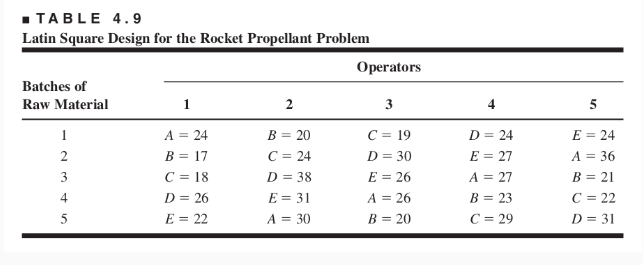

##Bibliotecas

In [ ]:
# Instalar o pacote tidyverse, se ainda não estiver instalado
if (!require(tidyverse)) install.packages('tidyverse')

# Carregar o pacote tidyverse
library(tidyverse)

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
library(tibble)

In [ ]:
if (!require(car)) install.packages('car')

library(car)

Loading required package: car

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘car’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [ ]:
if (!require(agricolae)) install.packages('agricolae')

library(agricolae)

Loading required package: agricolae

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘agricolae’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘AlgDesign’




In [ ]:
if (!require(MASS)) install.packages('MASS')

library(MASS)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




##Entrada e formatação de dados

In [ ]:
data <- tibble(
  batch = rep(1:5, each = 5),
  operator = rep(1:5, times = 5),
  propellant = c("A", "B", "C", "D", "E",
                  "B", "C", "D", "E", "A",
                  "C", "D", "E", "A", "B",
                  "D", "E", "A", "B", "C",
                  "E", "A", "B", "C", "D"),
  rate = c(24, 20, 19, 24, 24,
            17, 24, 30, 27, 36,
            18, 38, 26, 27, 21,
            26, 31, 26, 23, 22,
            22, 30, 20, 29, 31)
)

data %>%
  arrange(operator, batch)


batch,operator,propellant,rate
<int>,<int>,<chr>,<dbl>
1,1,A,24
2,1,B,17
3,1,C,18
4,1,D,26
5,1,E,22
1,2,B,20
2,2,C,24
3,2,D,38
4,2,E,31


##Conversão

In [ ]:
data$batch <- as.factor(data$batch)
data$operator <- as.factor(data$operator)
data$propellant <- as.factor(data$propellant)
str(data)

tibble [25 × 4] (S3: tbl_df/tbl/data.frame)
 $ batch     : Factor w/ 5 levels "1","2","3","4",..: 1 1 1 1 1 2 2 2 2 2 ...
 $ operator  : Factor w/ 5 levels "1","2","3","4",..: 1 2 3 4 5 1 2 3 4 5 ...
 $ propellant: Factor w/ 5 levels "A","B","C","D",..: 1 2 3 4 5 2 3 4 5 1 ...
 $ rate      : num [1:25] 24 20 19 24 24 17 24 30 27 36 ...


##Análise Exploratória

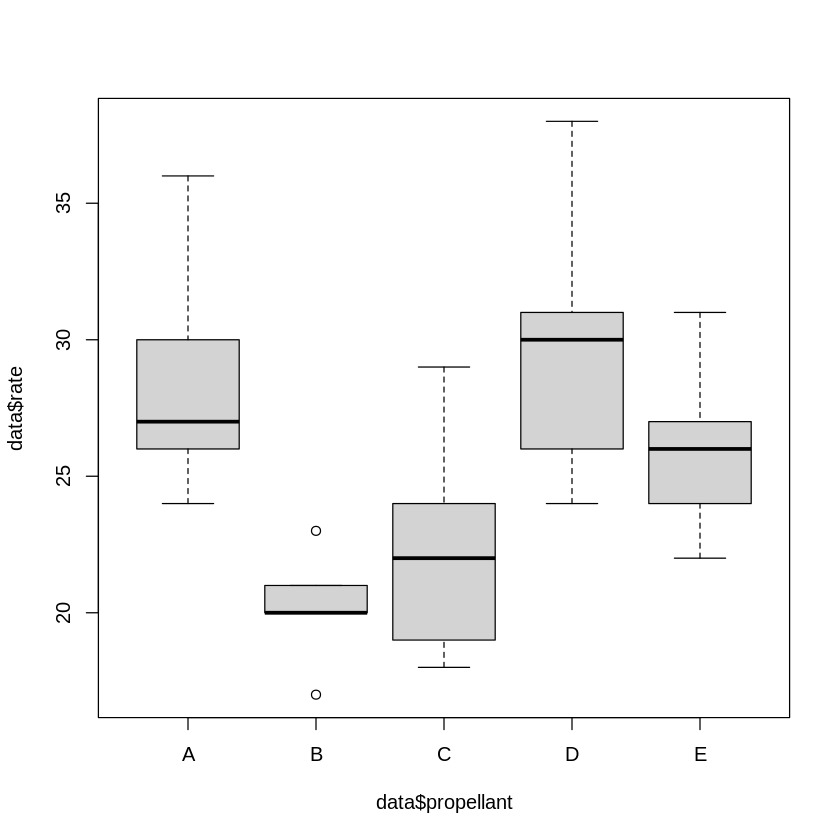

In [ ]:
boxplot(data$rate ~ data$propellant)

##Estatísticas Descritivas

In [ ]:
(media <- tapply(data$rate,data$propellant,mean))

A    B    C    D    E 
28.6 20.2 22.4 29.8 26.0

In [ ]:
(sd.data <- tapply(data$rate,data$propellant,sd))

A        B        C        D        E 
4.669047 2.167948 4.393177 5.403702 3.391165

In [ ]:
(soma.linha <- tapply(data$rate,data$batch,sum))

1   2   3   4   5 
111 134 130 128 132

In [ ]:
(soma.coluna <- tapply(data$rate,data$operator,sum))

1   2   3   4   5 
107 143 121 130 134

In [ ]:
(soma.Trat <- tapply(data$rate,data$propellant,sum))


A   B   C   D   E 
143 101 112 149 130

##Extraindo resíduos

In [ ]:
mod1 <- aov(data$rate ~ batch + operator + propellant, data=data)
res.s <- rstudent(mod1)

##Verificação dos pressupostos básicos

###Normalidade

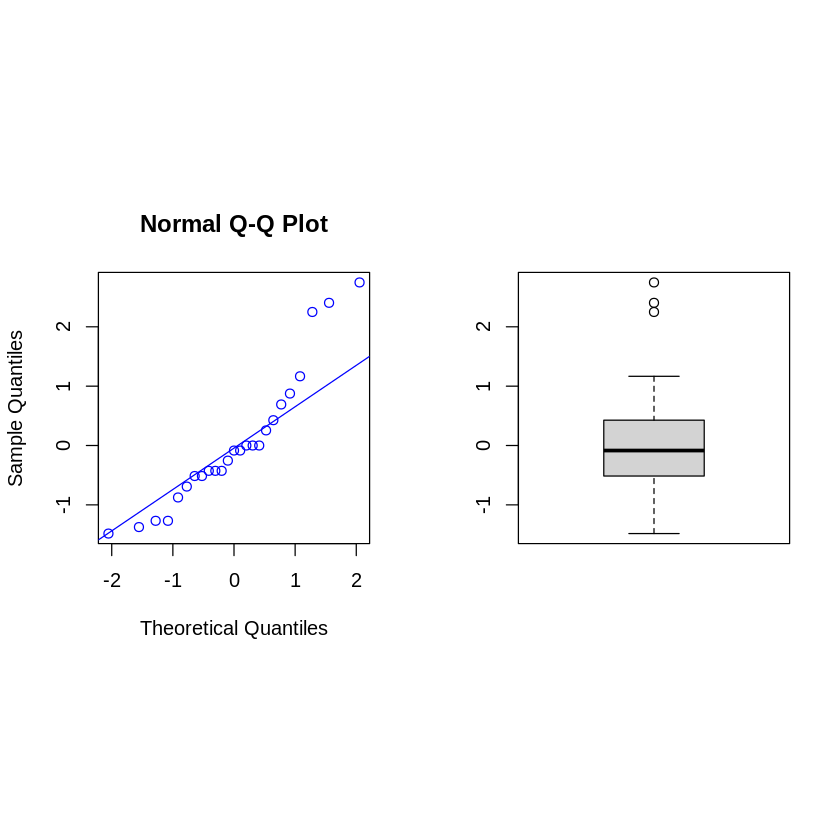

In [ ]:
# qq plot
par(mfrow=c(1,2),pty="s")
qqnorm(res.s,col="blue")
qqline(res.s,col="blue")
boxplot(res.s)

In [ ]:
# Shapiro Wilk
shapiro.test(res.s)


	Shapiro-Wilk normality test

data:  res.s
W = 0.90193, p-value = 0.02021


### Transformação de Box Cox


	Shapiro-Wilk normality test

data:  data$rate_boxcox
W = 0.98509, p-value = 0.9641


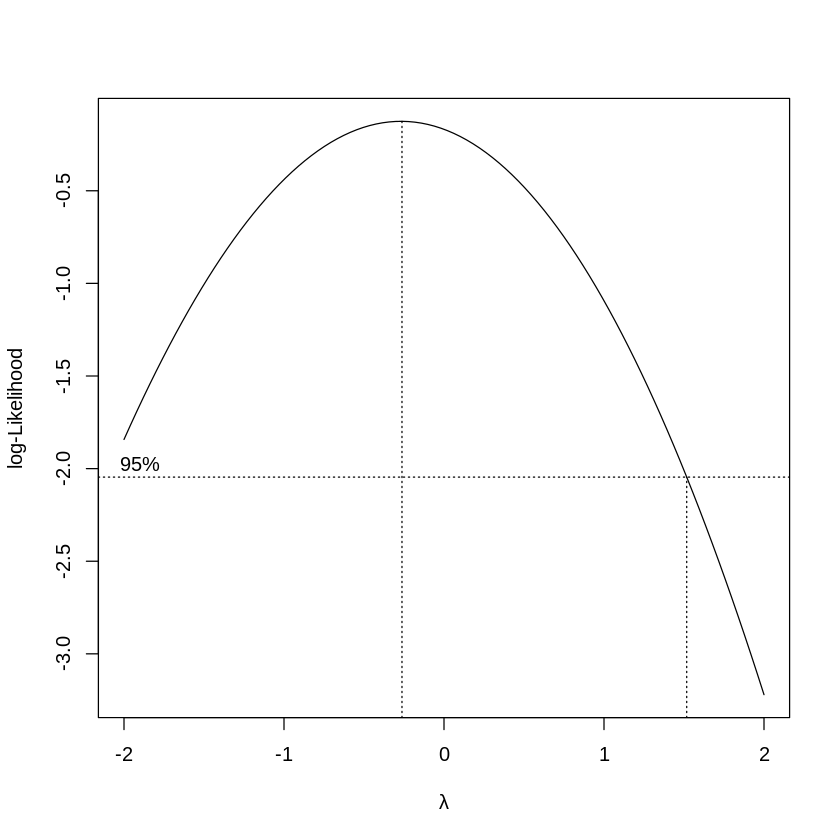

In [ ]:
boxcox_result <- boxcox(lm(rate ~ 1, data = data))

lambda_optimal <- boxcox_result$x[which.max(boxcox_result$y)]

data$rate_boxcox <- if(lambda_optimal == 0) log(data$rate) else (data$rate^lambda_optimal - 1) / lambda_optimal

shapiro.test(data$rate_boxcox)

### Extraindo resíduos do novo conjunto de dados transformados

In [ ]:
mod1 <- aov(data$rate_boxcox ~ batch + operator + propellant, data=data)
res.s <- rstudent(mod1)

###Homogeneidade de variâncias

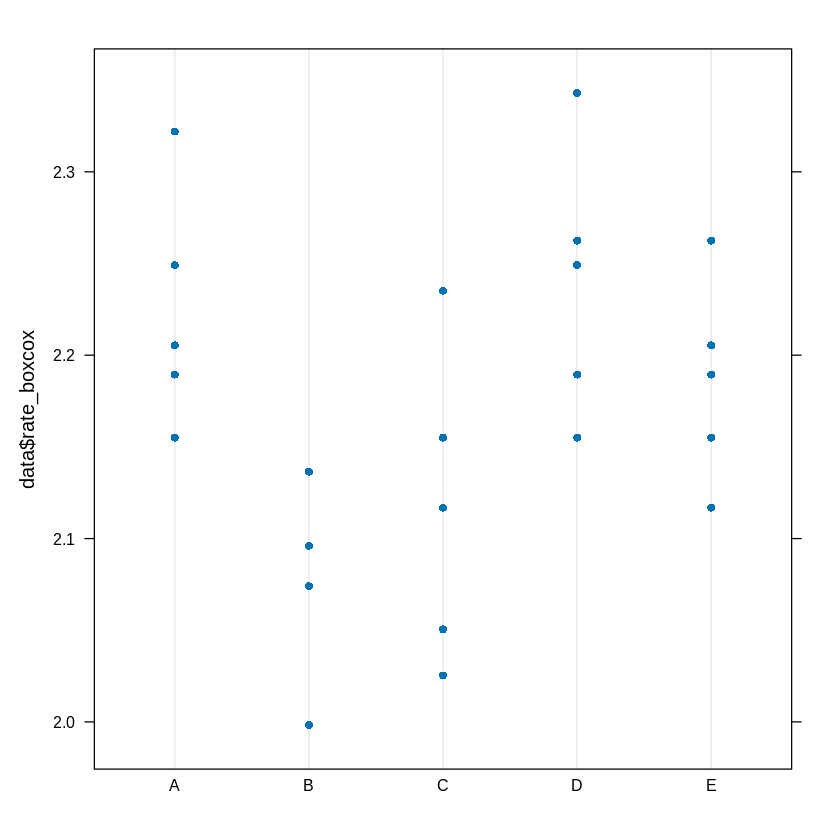

In [ ]:
par(mfrow=c(1,2))
require(lattice)
dotplot(data$rate_boxcox ~ data$propellant)

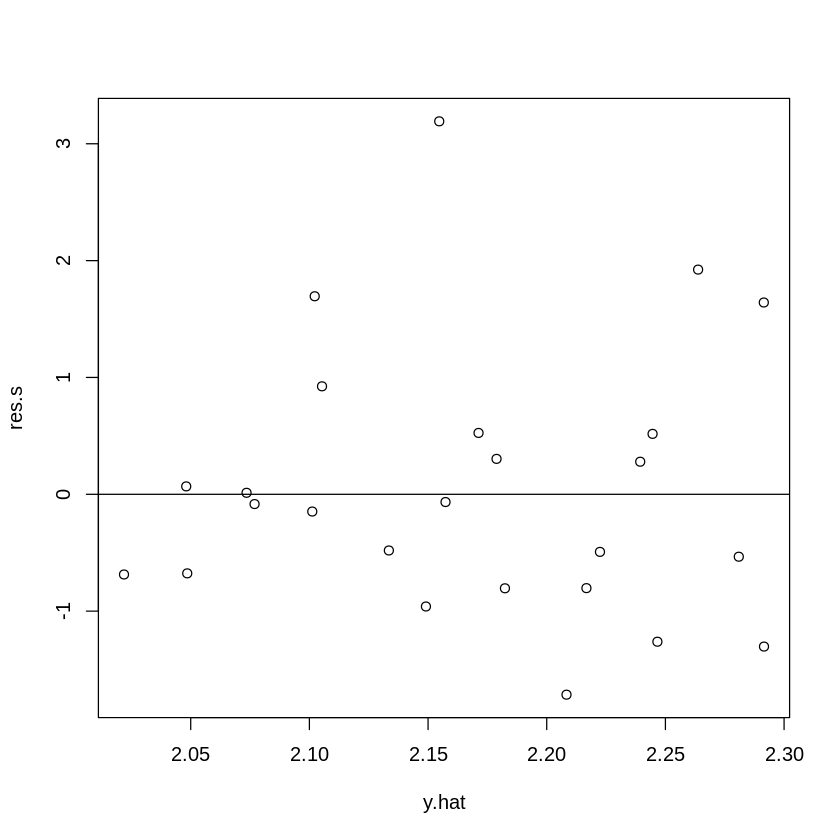

In [ ]:
plot(mod1$fit,res.s,xlab="y.hat")
abline(h=0)

In [ ]:
bartlett.test(data$rate_boxcox ~ data$propellant)


	Bartlett test of homogeneity of variances

data:  data$rate_boxcox by data$propellant
Bartlett's K-squared = 1.2539, df = 4, p-value = 0.8692


###Teste para independência

In [ ]:
durbinWatsonTest(mod1)

 lag Autocorrelation D-W Statistic p-value
   1      -0.1929497      2.274364    0.98
 Alternative hypothesis: rho != 0

##ANOVA

In [ ]:
(n <- length(data$rate_boxcox))
(correcao <- n*mean(data$rate_boxcox)^2)
(SQTotal  <- sum(t(data$rate_boxcox)%*%data$rate_boxcox)-correcao)
(SQLinha  <- sum(soma.linha^2)/5-correcao)
(SQTrat   <- sum(soma.Trat^2)/5-correcao)
(SQColuna <- sum(soma.coluna^2)/5-correcao)
(SQRes    <- SQTotal - SQLinha - SQColuna-SQTrat)


(SQRes    <- SQTotal - SQLinha - SQColuna-SQTrat)
p <- 5
(gl.Trat <- p-1)
(gl.Res  <- (p-2)*(p-1))
(QMTrat <- SQTrat/gl.Trat)
(QMRes <- SQRes/gl.Res)

[1] 25

[1] 117.552

[1] 0.1866848

[1] 16079.45

[1] 16341.45

[1] 16161.45

[1] -48582.16

[1] -48582.16

[1] 4

[1] 12

[1] 4085.362

[1] -4048.513

In [ ]:
(Fcalc <- QMTrat/QMRes)
(valor.p <- pf(Fcalc,gl.Trat,gl.Res,lower.tail=F))

[1] -1.009102

[1] 1

##Resumo

In [ ]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
batch,4,68,17.00000,1.593750,0.239058537
operator,4,150,37.50000,3.515625,0.040373048
propellant,4,330,82.50000,7.734375,0.002536502
Residuals,12,128,10.66667,NA,NA


In [ ]:
summary(mod1,intercept = T)

            Df Sum Sq Mean Sq  F value   Pr(>F)    
(Intercept)  1  16129   16129 1512.094 5.39e-14 ***
batch        4     68      17    1.594  0.23906    
operator     4    150      37    3.516  0.04037 *  
propellant   4    330      83    7.734  0.00254 ** 
Residuals   12    128      11                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

##Teste de Tukey

In [ ]:
layout(1)
graf <- TukeyHSD(mod1,cterms="propellant",order=T)
model.tables(mod1, cterms="propellant",type="means")
(gl.Res <- df.residual(mod1))
(QMRes  <- sigma(mod1)^2)
alpha  <- 0.05
a <- 5 # Número de tratamentos

Tables of means
Grand mean
     
25.4 

 propellant 
propellant
   A    B    C    D    E 
28.6 20.2 22.4 29.8 26.0 

[1] 12

[1] 10.66667

In [ ]:
names(graf)
class(graf$propellant)
graf$propeller[,1]

[1] "batch"      "operator"   "propellant"

[1] "matrix" "array"

NULL

In [ ]:
q   <- qtukey(0.95, a, gl.Res)
(dms <- q*sqrt(QMRes/5))

graf$propellant[,1] > dms

[1] 6.583932

C-B   E-B   A-B   D-B   E-C   A-C   D-C   A-E   D-E   D-A 
FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE

In [ ]:
Teste <- HSD.test(mod1,"propellant",group=T)
names(Teste)
Teste$statistics
Teste$means

[1] "statistics" "parameters" "means"      "comparison" "groups"

,MSerror,Df,Mean,CV,MSD
,<dbl>,<int>,<dbl>,<dbl>,<dbl>
,10.66667,12,25.4,12.85821,6.583932


,data$rate,std,r,se,Min,Max,Q25,Q50,Q75
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,28.6,4.669047,5,1.460593,24,36,26,27,30
B,20.2,2.167948,5,1.460593,17,23,20,20,21
C,22.4,4.393177,5,1.460593,18,29,19,22,24
D,29.8,5.403702,5,1.460593,24,38,26,30,31
E,26.0,3.391165,5,1.460593,22,31,24,26,27


In [ ]:
Teste$comparison # Não apresenta porque group=T
Teste$groups     # Apresenta porque group=T

NULL

,data$rate,groups
,<dbl>,<chr>
D,29.8,a
A,28.6,ab
E,26.0,abc
C,22.4,bc
B,20.2,c


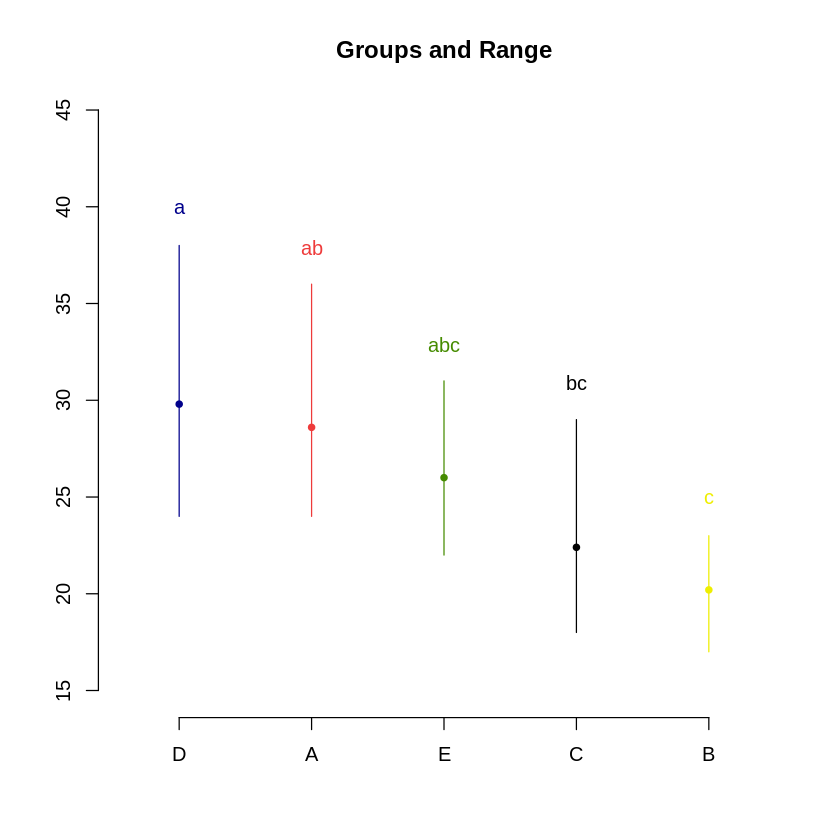

In [ ]:
plot(Teste)